In [14]:
import pandas as pd
import math 
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('../src')
import utils_explore as ue

data = ue.all_bets()

In [15]:
# select interesting authors and the most recent time (~6 month)
authors = ['chaplygin', 'falcao1984', 'teplofevralya', 'nvaluev', 'ostapbender', 'karpovvyacheslav', 'netsenko', 'zhukov']
ratio = [1, 1, 1, 1, 1, 1, 1, 1]
df = data[(data.author.isin(authors)) & (data['placed-date']>=datetime.date(2019, 5, 1))]

In [16]:
#group data by weeks, then add amount ratio for every author, 
# then calculate count and success rate with this new amounts
df_weekly = ue.calc_win_rate(df, 'W')
df_amount = pd.DataFrame({'author' : authors, 'ratio' : ratio}) # authors = ['chaplygin', 'falcao1984', 'teplofevralya']
df_weekly = df_weekly.merge(df_amount, on='author', how="left").drop(columns=['author','success_rate','return'])
df_weekly['count'] = df_weekly['count'] * df_weekly['ratio']
df_weekly['win'] = df_weekly['win'] * df_weekly['ratio']
#summarize on weeks
df_weekly = df_weekly.groupby(by='placed-date').agg('sum')
df_weekly['success_rate'] = df_weekly['win'] / df_weekly['count'] * 100
df_weekly.reset_index(inplace=True)
#df_weekly

In [17]:
# size of each stake depends on budget
# the budget spreads with respekt to amount ratio
budget = 800
single_stake = budget / df_weekly['count'].mean()
df_amount['stake'] = df_amount['ratio'] * single_stake
df_amount

,author,ratio,stake
0,chaplygin,1,28.054299
1,falcao1984,1,28.054299
2,teplofevralya,1,28.054299
3,nvaluev,1,28.054299
4,ostapbender,1,28.054299
5,karpovvyacheslav,1,28.054299
6,netsenko,1,28.054299
7,zhukov,1,28.054299


In [18]:
#simple outcome 
df_weekly['fin-result'] = df_weekly['win'] * single_stake
df_weekly['fin-result'].sum()

2859.0135746606334

In [19]:
tax = 0.95 #taxes
bets_inaccuracy = 0.9 #my odds are often differ (they are smaller) 
round(df_weekly['fin-result'].sum() * tax * bets_inaccuracy, 1)

2444.5

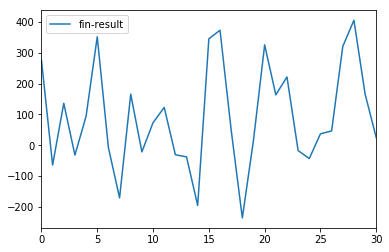

In [20]:
#detailed
df_weekly[['placed-date','fin-result']].plot()

In [21]:
df_weekly['fin-result'].describe()

count     31.000000
mean      92.226244
std      171.998416
min     -235.936652
25%      -26.230769
50%       49.656109
75%      193.995475
max      405.665158
Name: fin-result, dtype: float64

In [22]:
#fail analysis... no pattern
#df[(df['placed-date'] >= datetime.date(2019,9,2)) & (df['placed-date'] <= datetime.date(2019,9,8))]

In [23]:
#MONTHLY
df_4w = df_weekly.groupby(df_weekly.index / 4).agg({'fin-result':'sum'})
df_4w

,fin-result
0,315.610860
1,267.918552
2,340.018100
3,81.076923
4,203.674208
5,693.502262
6,360.778281
7,596.434389


In [24]:
df_4w.describe()

,fin-result
count,8.000000
mean,357.376697
std,200.055361
min,81.076923
25%,251.857466
50%,327.814480
75%,419.692308
max,693.502262


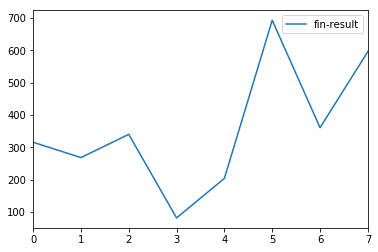

In [25]:
df_4w.plot()